In [56]:
#Look across all previously generated figures and tables and write at least three observations
#or inferences that can be made from the data. Include these observations at the top of notebook.

#Based on Capomulin treament on line plot, Capomulin doesn't reduce tumor volume with timepoints. 
#It only show slight decrease tumor volume on first 0 to 1. And then tumor volume goes up. Therefore, Capomulin is not good Regimens of reducing tumor volume

#Based on scatter data of weight and tumor volume, tumor volume is growing based on weight.
#If we look at P value on linregress result, P value is less than 0.05. It means there is less than 5% of possiblity that weight and volume is not correlated[H0 - weight and volume is not related].
#Therfore, weight and tumor volume is related.

#Based on box and whisker plot of final tumor volume of four treatment regimens, Capomulin and Ramicane has least mean of tumor volume. We could guess those two regimens are most effective.
#However, Capmulin treatment of line plot on i557 mouse, Tumor volume doesn't decreased at all. So we have to check another data for verify box and whisker plot shows valuable data.

#Capomulin and Ramicane have tested on more than 200 mouse and these two regimens are top 2 out of 10.
#So we could guess these two regimens test result are more reliable than other 8 regimens according to number of test.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [58]:
metadata = pd.read_csv("Resources/Mouse_metadata.csv")
studydata = pd.read_csv("Resources/Study_results.csv")

In [59]:
#Checking data format
print(metadata.head())
print(studydata.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [60]:
#data merge
combined_data = pd.merge(metadata, studydata, how='outer', on='Mouse ID')

In [61]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mouse 

array(['g989'], dtype=object)

In [63]:
#remove duplicate 
clean_mouse_df = combined_data[combined_data["Mouse ID"].isin(dup_mouse)==False]
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].unique())

248

In [65]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation,3
# and SEM of the tumor volume for each drug regimen.

#mean
drug_group = clean_mouse_df.groupby('Drug Regimen')
drug_group.mean()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [66]:
#median
drug_group.median()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0
Placebo,10.0,28.0,15.0,52.288934,1.0
Propriva,7.5,26.0,15.0,50.446266,1.0
Ramicane,9.0,19.0,20.0,40.673236,0.0
Stelasyn,14.0,28.0,20.0,52.431737,1.0


In [67]:
drug_group['Tumor Volume (mm3)'].var()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [68]:
#standard deviation
drug_group['Tumor Volume (mm3)'].std()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [69]:
#sem value
drug_group.sem()

,Age_months,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,0.570986,0.090952,NaN,NaN,1.124214,0.544332,0.140799
Ramicane,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


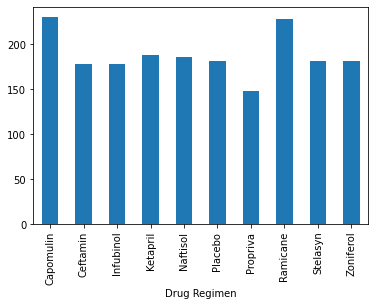

In [70]:
#number of total mice for each treatment regimen
#Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows  the number of total mice for each treatment regimen throughout the course of the study.
#gather count value of mice by grouping
drag_mice_count = drug_group['Mouse ID'].count()

#Bar chart by pandas
drag_mice_count.plot(kind='bar') 


([<matplotlib.axis.XTick at 0x1f3b4e07e20>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

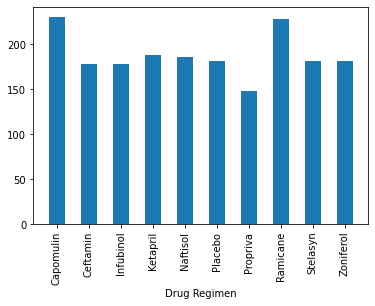

In [71]:
#Bar chart by Matplotlib

x_axis = np.arange(len(drug_group['Mouse ID']))
plt.xlabel("Drug Regimen")

plt.bar(x_axis, drag_mice_count, alpha = 1, align="center", width=0.5)


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                          'Naftisol', 'Placebo', 'Propriva', 'Ramicane',
                          'Stelasyn', 'Zoniferol'],  rotation='vertical' )

<ipython-input-72-9a80f7abdecf>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel("Mouse ID")


Text(0, 0.5, 'Mouse ID')

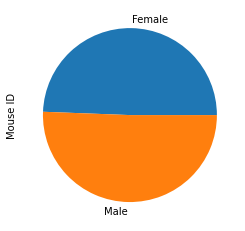

In [72]:
#Generate a pie plot using both Pandas's DataFrame.plot() 
#and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

sex_group = combined_data.groupby('Sex')
sex_group_count = sex_group['Mouse ID'].count()

#Bar chart by Matplotlib
labels= ['Female', 'Male']
plt.pie(sex_group_count, labels = labels)
plt.axes().set_ylabel("Mouse ID")


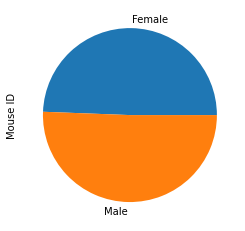

In [73]:
#Bar chart by pandas
sex_group_count.plot(kind='pie') 

In [74]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin.
regimens_list = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

#Getting specific regimens in combined data
best_regimens = combined_data[combined_data["Drug Regimen"].isin(regimens_list)]

#sort data by timepoint largest to smallest
best_regimens = best_regimens.sort_values(["Timepoint"], ascending = False) 
best_regimens = best_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#Showing max timpoint of each Mouse ID (final tumor volume)
best_regimens.loc[best_regimens["Timepoint"] == 45]

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
1813,Infubinol,y163,45,67.685569
19,Capomulin,s185,45,23.343598
1855,Ceftamin,y865,45,64.729837
1670,Ceftamin,w151,45,67.527482


In [75]:
# Calculate the quartiles and IQR and quantitatively determine 
#if there are any potential outliers across all four treatment regimens.
best_regimens_timepoint = best_regimens.loc[best_regimens["Timepoint"] == 45]

quartiles = best_regimens_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


outlier_occupancy = best_regimens_timepoint.loc[(best_regimens_timepoint['Tumor Volume (mm3)'] < lower_bound) | (best_regimens_timepoint['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 33.48002734
The upper quartile of occupancy is: 62.14221369
The interquartile range of occupancy is: 28.66218635
The the median of occupancy is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)


In [76]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
#and highlight any potential outliers in the plot by changing their color and style.
#make data with certain column
best_regimens_data = best_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#check data
best_regimens_data

#Data frame work
best_regimen_df = pd.DataFrame(best_regimens_data)
best_regimen_df


#grouping regimens and get tumor value in list
bot_data_df = best_regimen_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
final_df = pd.DataFrame(bot_data_df)
#reindex data for clean graph
final_df = final_df.reindex(regimens_list)
#check data in new index number
final_df
#for loop for getting data in []
tumor_vols = [vol for vol in final_df['Tumor Volume (mm3)']]
#check data
tumor_vols


[[47.68596303,
  33.32909778,
  32.37735684,
  31.896238399999998,
  31.02392294,
  34.45529799,
  37.07402422,
  38.84687569,
  38.93963263,
  36.04104736,
  38.98287774,
  38.125164399999996,
  37.31184577,
  40.65812366,
  40.1592203,
  40.72857787,
  41.48300765,
  41.58152074,
  28.48403281,
  28.43096411,
  23.34359787,
  31.47541076,
  45.56582103,
  46.82106972,
  42.1510148,
  36.84389799,
  36.02413752,
  40.17192011,
  40.77081259,
  25.47214326,
  33.94934131,
  28.16739732,
  32.94761484,
  41.04204489999999,
  31.80484133,
  44.5850896,
  31.378045299999997,
  38.255627399999995,
  38.34390154,
  35.61130861,
  36.35685121,
  38.3797259,
  41.66491577,
  36.17595269,
  38.95411458,
  33.51567063,
  41.43924156,
  44.70283296,
  44.16051879,
  37.96764437,
  28.32853059,
  40.207288500000004,
  39.84757556,
  40.40176542,
  38.75326548,
  37.68276664,
  43.76570537,
  33.06933705,
  36.3278696,
  35.45948978,
  30.83435704,
  30.20682488,
  45.94194901,
  32.56283914,
  40

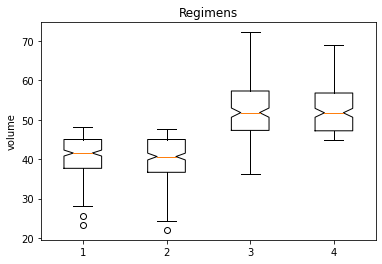

In [77]:
#box plot of final tumor volume of four regimens

fig1, ax1 = plt.subplots()
ax1.set_title("Regimens")
ax1.set_ylabel("volume")
ax1.boxplot(tumor_vols, regimens_list)
plt.show()


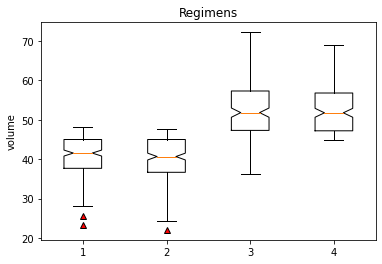

In [78]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
#and highlight any potential outliers in the plot by changing their color and style.

green_diamond = dict(markerfacecolor='red', marker='^')
fig1, ax1 = plt.subplots()
ax1.set_title("Regimens")
ax1.set_ylabel("volume")
ax1.boxplot(tumor_vols, regimens_list,flierprops=green_diamond)
plt.show()
#regimens_list = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

Text(0.5, 1.0, 'ID : i557 on Capomulin')

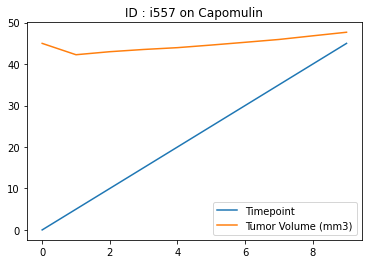

In [79]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

#pick mouse(i557) which is treated capomulin
id_select = combined_data[combined_data["Mouse ID"].isin(["i557"])]
id_select

#pick column for data
id_select_df = id_select[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
id_select_df

#re-index number for clean grpah
new_index = id_select_df.reset_index()

#graph
data_set = new_index[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_graph = data_set.plot.line()
plt.title("ID : i557 on Capomulin")

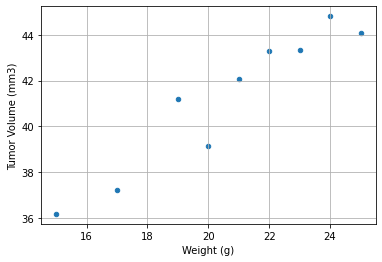

In [80]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
#pick Capomulin on cominbed data sheet
drug_select = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]
drug_select

#pick column
drug_select_df = drug_select[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

#sorting data(weight) for graph
data_sort = drug_select_df.sort_values(["Weight (g)"], ascending=True)
data_sort
#get mean
data_sortweight_avg = data_sort.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
data_sortweight_avg

#re-index for graph
reset_index_2 = pd.DataFrame(data_sortweight_avg).reset_index()
reset_index_2
#graph
reset_index_2.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", grid = True)


In [81]:
#Calculate the correlation coefficient and linear regression model between mouse weight and 
#average tumor volume for the Capomulin treatment. 
x_values = reset_index_2['Weight (g)']
y_values = reset_index_2['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq


'y = 0.89x + 22.76'

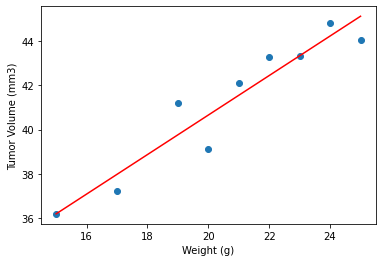

In [82]:
# Plot the linear regression model on top of the previous scatter plot.
# Add the linear regression equation and line to plot

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [54]:

linregress(x_values, y_values)

LinregressResult(slope=0.8947726097340637, intercept=22.764229983591882, rvalue=0.9505243961855266, pvalue=8.449451040646421e-05, stderr=0.11052782862741367)